In [6]:
import numpy as np
import pandas as pd
import os
import datetime
import re
import math
from sklearn.utils import shuffle
import seaborn as sb
import matplotlib.pyplot as plt
import json

import matplotlib.dates as mdates
import matplotlib.cbook as cbook
#scipy is used to get pearson correlation between features
from scipy import stats

In [ ]:
#Working with data on EV charding infrastructure
edu_attainment_df = pd.read_csv("../Data/Edu_attainment.csv")
print(infra_df.info())
print(infra_df.describe())

In [ ]:
#Get state wise market share data
market_share_df = pd.read_csv("../Data/Market_share.csv")
print(market_share_df.info())
print(market_share_df.describe())

In [ ]:
#Sorting by state name
market_share_df = market_share_df.sort_index(by=['State'])
print(market_share_df.describe())
print(market_share_df.head())

In [ ]:
#Sorting by state name
edu_attainment_df = edu_attainment_df.sort_index(by=['State'])
print(edu_attainment_df.describe())
print(edu_attainment_df.head())

In [ ]:
edu_attainment_df.index = edu_attainment_df['State']
market_share_df.index = market_share_df['State']
print(market_share_df.head())
print(edu_attainment_df.head())

In [ ]:
data_df = edu_attainment_df
print(data_df.head())
market_share_df_copy = market_share_df.drop(['State'], axis = 1)
data_df = data_df.join(market_share_df_copy)
data_df = data_df.drop(['State'], axis =1)
print(data_df.head())

In [ ]:
data_df = data_df.rename(index=str, columns={"Quality of Education Rank ": "Quality of Education Rank"})
data_df.info()

In [ ]:
data_df['Market Share'] = data_df['Market Share'].map(lambda x: float(str(x).split('%')[0]))
data_df.head()
data_df['Quality of Education Rank'] = data_df['Quality of Education Rank'].map(lambda x: float(x))

In [ ]:
#Get correlation between "quality of education" and "EV market share" statewise

r = stats.pearsonr(data_df['Market Share'],  data_df['Quality of Education Rank'])
print("The correlation coefficient b/w market share and  education attainment is : ", r)

In [ ]:
data_df.index = data_df.index.map(lambda x: str(x))
print(type(data_df.index[0]))

In [ ]:
#Plotting a bubble graph to see correlation between educational attainment and market share state wise
import seaborn as sns

# create data
rank = data_df['Quality of Education Rank']
share = data_df['Market Share']
state = data_df.index.tolist()
 
# Change color with c and alpha. I map the color to the X axis value.
fig, ax = plt.subplots()
ax.scatter(rank, share, c=-x, label=z, s=100,  cmap="Blues", alpha=3, linewidth=2)
# for i in state:
#     ax.annotate(i ,xy=(rank, share), xytext=(0,np.sqrt(rank)/2.+5), 
#                  textcoords="offset points", ha="center", va="bottom")
 
# Add titles (main and on axis)
plt.xlabel("Quality of education Ranking")
plt.ylabel("EV Market Share")
plt.title("Education Attainment vs Market Share")
 
plt.show()


In [ ]:
infra_df = pd.read_csv("../Data/ElectricStationsCounts.csv")
infra_df = infra_df.sort_index(by = ['State'])
infra_df.index = infra_df['State']
infra_df = infra_df.drop(['State'], axis = 1)
print(infra_df.info())

In [ ]:
infra_df.head()

In [ ]:
data_df['Charging Points Count'] = infra_df['Charging Points']
data_df['Charging Points Count'] = data_df['Charging Points Count'].map(lambda x : float(x))
data_df.info()
data_df.drop(['CHarging Points Count'], axis = 1)

In [ ]:
r = stats.pearsonr(data_df['Charging Points Count'], data_df['Market Share'])
r

In [ ]:
state_to_code = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [ ]:
income_df = pd.read_csv("../Data/Income_Parsed.csv")
income_df.index = income_df['State']
income_df = income_df.drop(['State'], axis = 1)
income_df.info()

In [ ]:
income_df['Avg Household Income'] = income_df['Avg Household Income'].map(lambda x : float(x))
income_df.info()

In [ ]:
data_df['Avg Household Income'] = income_df['Avg Household Income']
data_df.info()

In [ ]:
r = stats.pearsonr(data_df['Avg Household Income'], data_df['Market Share'])
r

In [ ]:
cal_gas_price_df = pd.read_csv("../Data/Cal_gs_price_change.csv")
cal_gas_price_df['EV Registrations'] = cal_gas_price_df['EV Registrations'].map(lambda x : float(x))
cal_gas_price_df.index  = cal_gas_price_df['Year']
cal_gas_price_df = cal_gas_price_df.drop(['Year'], axis = 1)
cal_gas_price_df.info()

In [ ]:
date = cal_gas_price_df.index

datemin =  (date.min())
datemax =  (date.max())
fig = plt.figure()
x_date = pd.date_range(date.min(), date.max(), freq='Y')

ax1 = fig.add_subplot(211)
ax1.plot(date, cal_gas_price_df['Gasoline Prices'], color = 'Blue')
plt.xlabel("Year")
plt.ylabel("Gasoline Price")

ax1.set_xlim(datemin, datemax)

ax2 = fig.add_subplot(212)
ax2.plot(date, cal_gas_price_df['EV Registrations'], color = 'Green')
plt.xlabel("Year")
plt.ylabel("EV Registrations Count")

# ax2.xaxis.set_major_locator(mdates.YearLocator(interval=1))
# ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax2.set_xlim(datemin, datemax)

fig.autofmt_xdate()

fig.suptitle('California State Trend between Gasoline Prices and EV registrations', fontsize=20)

fig.set_size_inches(10, 10)

plt.show()

In [ ]:
data_df.head()

In [9]:
from sklearn import preprocessing
import lightgbm as lgbm

/Users/apekshasinghal/Documents/venv_lar/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [10]:
import pandas as pd

In [11]:
train_df = pd.read_csv("../data/data_main.csv", nrows=45)
print(train_df.head())
test_df = pd.read_csv("../data/data_main.csv", nrows=5)
print(test_df.head())

        State  Registrations  Reg-2017  Change  HOV Lane Exemption  \
0  California        1188439   1043183  145256                   1   
1     Florida         233309    207838   25471                   1   
2   Minnesota          48587     43048    5539                   0   
3     Arizona          82545     72628    9917                   1   
4      Kansas          21402     19301    2101                   0   

   Purchase Rebate  Tax Credit  Parking Exemption  Registration Fee Rebate  \
0                1           0                  0                        0   
1                1           0                  0                        0   
2                0           0                  0                        0   
3                0           0                  1                        0   
4                0           1                  0                        0   

   Charging Rate Incentive  Supply Incentive  Educational Attainment  \
0                        1            

In [12]:
cat_cols = ['HOV Lane Exemption' , 'Purchase Rebate' , 'Tax Credit' , 'Parking Exemption' , 'Registration Fee Rebate' , 'Charging Rate Incentive' , 'Supply Incentive' ]

for col in cat_cols:
    encoder = preprocessing.LabelEncoder()
    encoder.fit(list(train_df[col].values.astype('str')) + list(test_df[col].values.astype('str')))
    train_df[col] = encoder.transform(list(train_df[col].values.astype('str')))
    test_df[col] = encoder.transform(list(test_df[col].values.astype('str')))
    
num_cols = ['Registrations','Educational Attainment' , 'Median Age' , 'Charging Station count' , 'Household Income' , 'Gasoline price']
for col in num_cols:
    train_df[col] = train_df[col].astype(float)
    test_df[col] = test_df[col].astype(float)

In [13]:
feat_list = ['HOV Lane Exemption' , 'Purchase Rebate' , 'Tax Credit' , 'Parking Exemption' , 'Registration Fee Rebate' , 'Charging Rate Incentive' , 'Supply Incentive' , 'Educational Attainment' , 'Median Age' , 'Charging Station count' , 'Household Income' , 'Gasoline price']
train_labels = train_df['Change']
test_labels = test_df['Change']
train_X = train_df[feat_list]
test_X = test_df[feat_list]

In [14]:
def run_lgb(train_X, train_y, val_X, val_y):
    params = {
        "objective" : "regression",
        "metric" : "rmse", 
        "num_leaves" : 200,
        "min_child_samples" : 100,
        "learning_rate" : 0.1,
        "min_data":1,
        "min_data_in_bin":1,
#         "bagging_fraction" : 0.8,
#         "feature_fraction" : 0.8,
#         "bagging_frequency" : 2,
        "verbosity" : 1,
        "max_depth" : 8
    }
    
    train_set = lgbm.Dataset(train_X, label=train_y)
    val_set = lgbm.Dataset(val_X, label=val_y)
    model = lgbm.train(params, train_set, 4000, valid_sets=[val_set], early_stopping_rounds=200, verbose_eval=100)
    
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return model, pred_val_y

# Training the model #
model, pred_val = run_lgb(train_X, train_labels, test_X, test_labels)

Training until validation scores don't improve for 200 rounds.
[100]	valid_0's rmse: 1.61912
[200]	valid_0's rmse: 4.30062e-05
[300]	valid_0's rmse: 1.14238e-09
[400]	valid_0's rmse: 5.28795e-11
[500]	valid_0's rmse: 5.28795e-11
Early stopping, best iteration is:
[350]	valid_0's rmse: 5.28795e-11


In [15]:
print(model.feature_name())
feature_importance  = model.feature_importance()
print(feature_importance)

['HOV_Lane_Exemption', 'Purchase_Rebate', 'Tax_Credit', 'Parking_Exemption', 'Registration_Fee_Rebate', 'Charging_Rate_Incentive', 'Supply_Incentive', 'Educational_Attainment', 'Median_Age', 'Charging_Station_count', 'Household_Income', 'Gasoline_price']
[2456 2135  623   26    0 1045  143 2290 1887 2834  100 1010]


In [16]:
pred_val

array([145256.,  25471.,   5539.,   9917.,   2101.])

In [22]:
charge_df  = pd.read_csv("../data/data_main.csv", nrows=10)
charge_df.head()

,State,Registrations,Reg-2017,Change,HOV Lane Exemption,Purchase Rebate,Tax Credit,Parking Exemption,Registration Fee Rebate,Charging Rate Incentive,Supply Incentive,Educational Attainment,Median Age,Charging Station count,Household Income,Gasoline price
0,California,1188439,1043183,145256,1,1,0,0,0,1,1,50.28,36.0,18300,91149,3.512
1,Florida,233309,207838,25471,1,1,0,0,0,0,1,48.42,41.6,2605,81708,2.321
2,Texas,192741,171126,21615,0,1,0,0,0,1,1,39.11,34.2,2872,88231,2.126
3,New York,188724,167428,21296,1,1,1,0,0,1,1,57.44,38.2,2391,104233,2.773
4,Michigan,82545,63805,18740,0,0,1,0,0,1,0,48.50,39.5,1131,68928,2.255


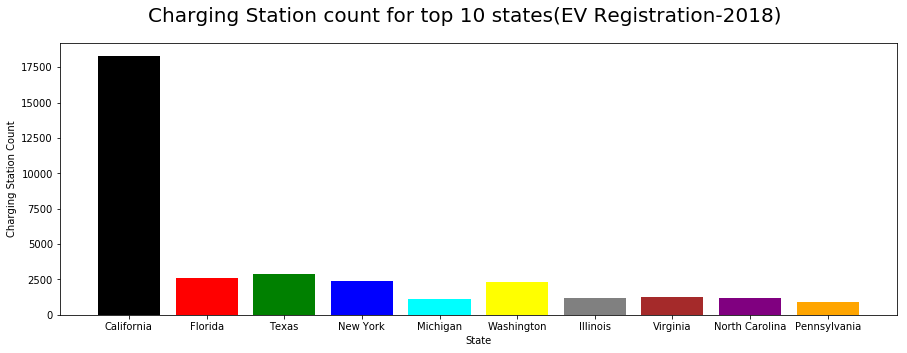

In [27]:


Reg_count = charge_df['Charging Station count']
State = charge_df['State']
y_pos_mean = np.arange(len(State))

fig = plt.figure()
fig.suptitle('Charging Station count for top 10 states(EV Registration-2018)', fontsize=20)
plt.xlabel("State")
plt.ylabel("Charging Station Count")
fig.set_size_inches(15, 5)

plt.bar(y_pos_mean, Reg_count, color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'gray', 'brown', 'purple', 'orange', 'Teal', 'maroon'])
plt.xticks(y_pos_mean, State)
plt.show()